✅ RMSE (평균 제곱근 오차): 0.851
✅ R² Score (결정 계수): 0.455


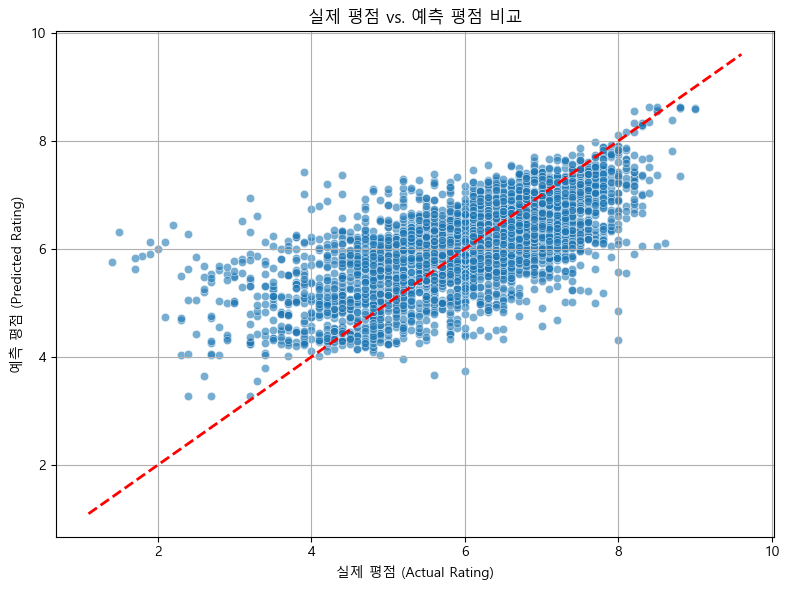

In [ ]:
import pandas as pd
import ast
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('movies_1980_2025.csv')
df = df[['Rating', 'MPA', 'Duration_minute', 'genres_imdb', 'popularity_score']].dropna()

def simplify_genres(val):
    try:
        genres = ast.literal_eval(val)
        return genres[0] if isinstance(genres, list) and genres else 'Unknown'
    except:
        return 'Unknown'

df['MainGenre'] = df['genres_imdb'].apply(simplify_genres)

X = df[['MPA', 'Duration_minute', 'MainGenre', 'popularity_score']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Duration_minute', 'popularity_score']
categorical_features = ['MPA', 'MainGenre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 과적합을 줄이기 위해 모델의 복잡도를 제어하는 옵션 추가
# max_depth: 트리의 최대 깊이를 제한
# min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 데이터 수
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,          # 옵션 추가
        min_samples_leaf=10,   # 옵션 추가
        random_state=42,
        n_jobs=-1              # 모든 CPU 코어를 사용하여 학습 속도 향상
    ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'✅ RMSE (평균 제곱근 오차): {rmse:.3f}')
print(f'✅ R² Score (결정 계수): {r2:.3f}')


# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('실제 평점 (Actual Rating)')
plt.ylabel('예측 평점 (Predicted Rating)')
plt.title('실제 평점 vs. 예측 평점 비교')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier  # <-- Regressor에서 Classifier로 변경
from sklearn.metrics import classification_report      # <-- 이제 사용 가능

df = pd.read_csv('movies_1980_2025.csv')
df = df[['Rating', 'MPA', 'Duration_minute', 'genres_imdb', 'popularity_score']].dropna()

def simplify_genres(val):
    try:
        genres = ast.literal_eval(val)
        return genres[0] if isinstance(genres, list) and genres else 'Unknown'
    except:
        return 'Unknown'

df['MainGenre'] = df['genres_imdb'].apply(simplify_genres)

# --- [문제 변환] 숫자인 평점(Rating)을 카테고리로 변경 ---
# 평점이 7점 이상이면 1 ('좋은 영화'), 미만이면 0 ('아쉬운 영화')으로 변환
df['GoodMovie'] = df['Rating'].apply(lambda x: 1 if x >= 7 else 0)

# 이제 문제(X)와 정답(y)은 새로운 기준으로 정의됩니다.
X = df[['MPA', 'Duration_minute', 'MainGenre', 'popularity_score']]
y = df['GoodMovie']  # <-- 정답을 'GoodMovie' 카테고리로 변경

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Duration_minute', 'popularity_score']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['MPA', 'MainGenre'])
    ])

# 파이프라인의 모델도 RandomForestClassifier로 변경합니다.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_leaf=10, random_state=42, n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = pipeline.predict(X_test)

print(f"학습 점수: {pipeline.score(X_train, y_train):.3f}")
print(f"테스트 점수: {pipeline.score(X_test, y_test):.3f}")

# 이제 분류 문제이므로 '분류 리포트'를 정상적으로 출력할 수 있습니다.
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

학습 점수: 0.815
테스트 점수: 0.819

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      3289
           1       0.77      0.33      0.47      1015

    accuracy                           0.82      4304
   macro avg       0.80      0.65      0.68      4304
weighted avg       0.81      0.82      0.79      4304

